# Lab 1

## Step 1 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2

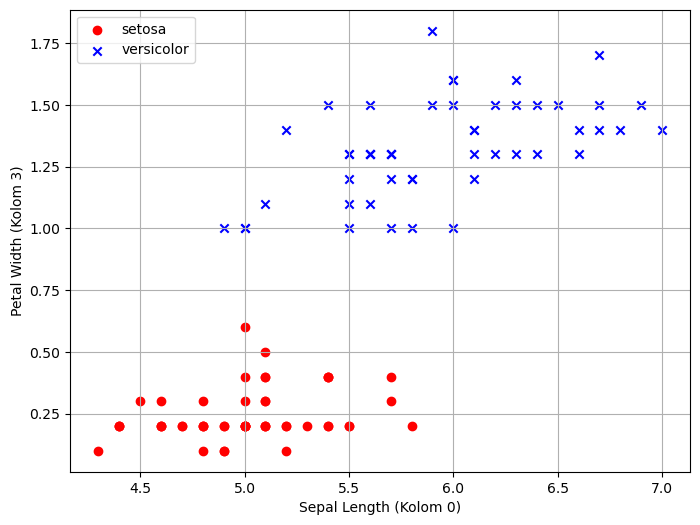

In [11]:
df = pd.read_csv('iris.csv', header=None)
for col in [0, 1, 2, 3]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)
setosa = df[df[4] == 'setosa'] 
versicolor = df[df[4] == 'versicolor']

a, b = 0, 3
plt.figure(figsize=(8, 6))
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Sepal Length (Kolom 0)')
plt.ylabel('Petal Width (Kolom 3)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Step 3

In [12]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Step 4

In [13]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

## Step 5

In [14]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

## Step 6

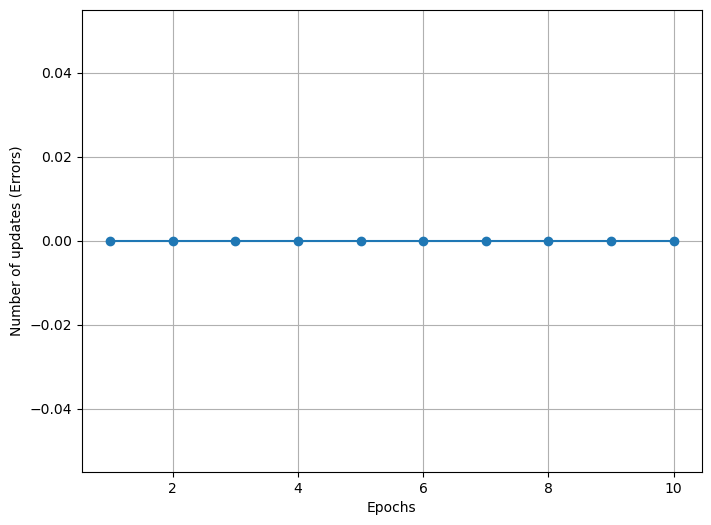

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates (Errors)')
plt.grid()
plt.show()

## Step 7

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20728\3398898301.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


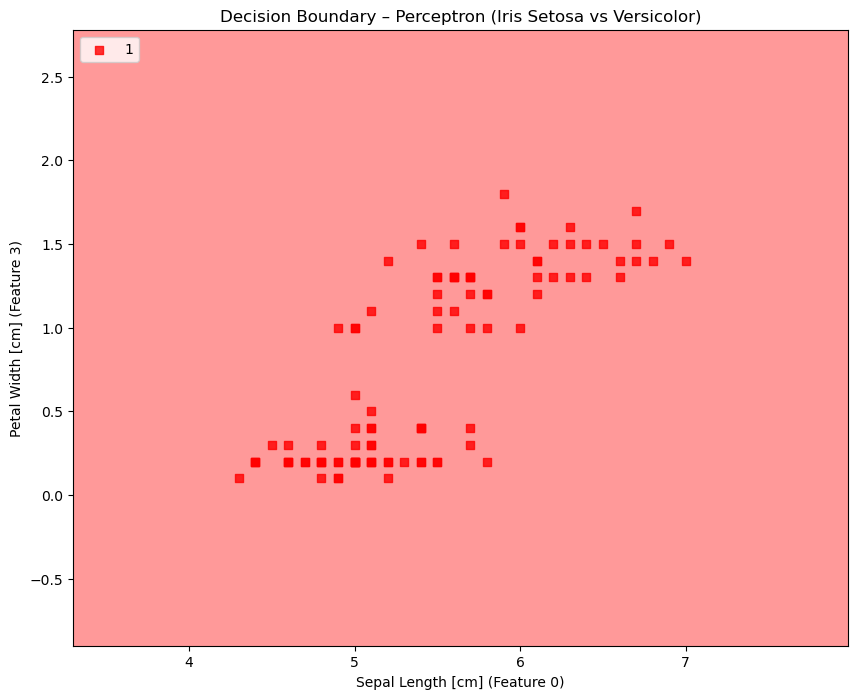

In [16]:
# Function to Plot Decision Region
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # feature range
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # grid for plotting
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )

    # prediction for grid points
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # plot background
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot the samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=cmap(i),
            marker=markers[i],
            label=cl
        )

# Plot Decision Boundary
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm] (Feature 0)')
plt.ylabel('Petal Width [cm] (Feature 3)')
plt.title('Decision Boundary – Perceptron (Iris Setosa vs Versicolor)')
plt.legend(loc='upper left')
plt.show()